In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


In [3]:
nb = GaussianNB()

In [4]:
data = pd.read_csv("Iris.csv")
data.head(3)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
X = data[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y = data["Species"]

In [6]:
xtrain , xtest , ytrain , ytest = train_test_split(X,y, test_size=0.2,random_state=23)

In [7]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder() 
ytrainfit = encoder.fit_transform(ytrain)
len(ytrain)
ytrainfit

array([0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 1, 2, 2, 2, 0, 1, 2, 2,
       0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 1, 0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0,
       0, 2, 2, 1, 0, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 0, 1, 0, 1, 1, 0, 2,
       1, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 0, 2,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 1])

In [8]:
ytestfit = encoder.fit_transform(ytest)
len(ytest)

30

In [9]:
fiting = nb.fit(xtrain,ytrainfit)

In [10]:
pred = nb.predict(xtest)

In [11]:
pred

array([2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1])

In [12]:
ytestfit

array([2, 2, 1, 0, 2, 1, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 0, 2, 0, 0, 2, 1, 1])

In [13]:
from sklearn.metrics import accuracy_score
print(accuracy_score(ytestfit, pred))

0.9333333333333333


In [14]:

from sklearn.metrics import confusion_matrix
hello = confusion_matrix (ytestfit, pred)
hello


array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  1,  9]], dtype=int64)

In [15]:
from sklearn.metrics import classification_report
print (classification_report(ytestfit, pred) )


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.88      0.88         8
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



<Axes: >

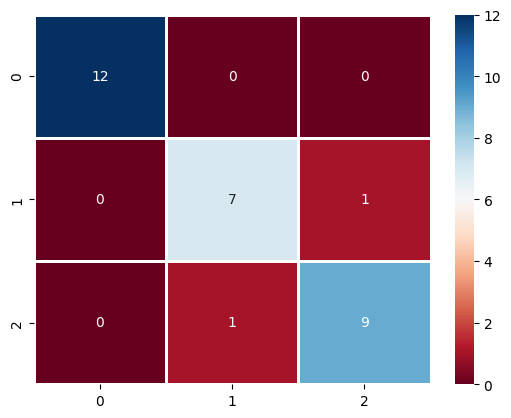

In [20]:
sns.heatmap(hello,annot=True, cmap='RdBu', linewidths=.9)